In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
def get_boxplot(column):
    "Функция построения box-plot заданной колонки"
    fig, ax = plt.subplots()
    sns.boxplot(x=column, y='score', 
                data=stud_math,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

def outlier(series):
    "Функция вывода гистограммы заданной колонки и вывода границы выбросов"
    IQR = series.quantile(0.75) - series.quantile(0.25)
    perc25 = series.quantile(0.25)
    perc75 = series.quantile(0.75)
 
    print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
    series.hist(label = 'IQR')
    plt.legend()
    if (series.max() > perc75 + 1.5*IQR) or (series.min() < perc25 - 1.5*IQR):
        print ('Есть выбросы')
    else:
        print ('Выбросов нет')

def get_stat_dif(column):
    "Функция выявления статистической значимости заданного признака на значения Score"
    cols = stud_math[column][stud_math[column].notnull()].unique()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
            <= 0.1/len(list (combinations(cols, 2))):
            return True
    return False

def unique_elements(count_unique_left, count_unique_right): 
    "Функция форматированного вывода уникальных значений без пропусков с заданным диапазоном количества уникальных значений"
    unique_values = {}
    for i in stud_math.nunique()[(stud_math.nunique() >= count_unique_left) & (stud_math.nunique() < count_unique_right)].index:
        unique_values[i] = stud_math[i][stud_math[i].notnull()].unique()

    for key,value in unique_values.items(): 
        print(("%10s" % (key)), ':', value)

def missed_ratio():
    "Функция подсчёта и сортировки доли пустых значений по колонкам"
    x = stud_math.isnull().sum() / (stud_math.count() + stud_math.isnull().sum())
    return x.sort_values(ascending=False)

In [3]:
stud_math = pd.read_csv('stud_math.xls')

In [4]:
stud_math.info()
# колонок больше, чем дано в описании задания 
# колонки 'studytime, granular' в описании нет, изучим эту колонку подробнее
# названия остальных колонок соответствуют заданию и подходят для работы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
stud_math[['studytime','studytime, granular']]
#изучим детальнее и близкую по названию колонку - studytime

,studytime,"studytime, granular"
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


array([[<AxesSubplot:title={'center':'studytime, granular'}>,
        <AxesSubplot:title={'center':'studytime'}>]], dtype=object)

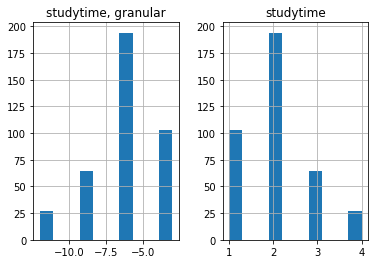

In [6]:
stud_math[['studytime, granular','studytime']].hist()

In [7]:
stud_math[['studytime','studytime, granular']].corr()
# колонки полностью обратно скоррелированы, значит одну из колонк можно удалить
# уберём колонку, которая не фигурирует в описании к заданию

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


In [8]:
stud_math.drop(['studytime, granular'], inplace = True, axis = 1)

In [9]:
stud_math.info()
#в дата сете присуствуют пустые ячейки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [10]:
stud_math
#присутствуют ячейки со значением NaN

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [11]:
stud_math.isnull().sum()
#проверим количество пропусков в каждой колонке

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

In [12]:
missed_ratio()
# видим, что доля пропусков составляет не более 11,4% для отдельно взятого столбца
# на данном этапе можно допустить такое количество пропусков за исключением нашего целевого показателя Score
# удалим все строки с пропусками значений в столбце Score

Pstatus       0.113924
paid          0.101266
famsup        0.098734
Fjob          0.091139
internet      0.086076
romantic      0.078481
guardian      0.078481
traveltime    0.070886
famrel        0.068354
famsize       0.068354
Fedu          0.060759
failures      0.055696
higher        0.050633
Mjob          0.048101
reason        0.043038
address       0.043038
nursery       0.040506
health        0.037975
activities    0.035443
absences      0.030380
freetime      0.027848
schoolsup     0.022785
goout         0.020253
studytime     0.017722
score         0.015190
Medu          0.007595
sex           0.000000
age           0.000000
school        0.000000
dtype: float64

In [13]:
stud_math.drop(index = stud_math[stud_math.score.isnull()].index, inplace=True, axis = 0)
missed_ratio().score
#удалили пустые значения из столбца с целевыми показателями

0.0

In [14]:
stud_math.nunique().sort_values()
# помимо пропусков, в данных могут быть ошибки и опечатки
# изучим детальнее наполнение столбцов
# посчитаем количество уникальных значений в каждом столбце на соответсвие описанию задания

school         2
sex            2
romantic       2
address        2
famsize        2
Pstatus        2
internet       2
higher         2
nursery        2
activities     2
paid           2
famsup         2
schoolsup      2
guardian       3
failures       4
studytime      4
traveltime     4
reason         4
Fjob           5
Mjob           5
Medu           5
freetime       5
goout          5
health         5
Fedu           6
famrel         6
age            8
score         18
absences      36
dtype: int64

In [15]:
# в большем количестве столбцов содержится небольшое количество уникальных значений
# посмотрим на эти значения

unique_elements(0,3)

#видим, что значения соответствуют описанию задания, ошибок нет

    school : ['GP' 'MS']
       sex : ['F' 'M']
   address : ['U' 'R']
   famsize : ['GT3' 'LE3']
   Pstatus : ['A' 'T']
 schoolsup : ['yes' 'no']
    famsup : ['no' 'yes']
      paid : ['no' 'yes']
activities : ['no' 'yes']
   nursery : ['yes' 'no']
    higher : ['yes' 'no']
  internet : ['yes' 'no']
  romantic : ['no' 'yes']


In [16]:
unique_elements(3,9)

       age : [18 17 15 16 19 22 20 21]
      Medu : [4. 1. 3. 2. 0.]
      Fedu : [ 4.  1.  2.  3. 40.  0.]
      Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
      Fjob : ['teacher' 'other' 'health' 'services' 'at_home']
    reason : ['course' 'other' 'home' 'reputation']
  guardian : ['mother' 'father' 'other']
traveltime : [2. 1. 3. 4.]
 studytime : [2. 3. 1. 4.]
  failures : [0. 3. 2. 1.]
    famrel : [ 4.  5.  3. -1.  2.  1.]
  freetime : [3. 2. 4. 1. 5.]
     goout : [4. 3. 2. 1. 5.]
    health : [3. 5. 1. 2. 4.]


In [17]:
# видим необычные значения 40 в столбце Fedu и -1 в столбце farmel
# судя по значениям это могут быть опечатки: в данных столбцах должны содержатся целые числа от 0 до 4 и от 1 до 5 соответственно
# проверим количество подозрительных значений в столбцах

In [18]:
stud_math.Fedu.value_counts()
#действительно, значение 40 всего одно, очень вероятно, что это опечатка, меняем его на значение 4

2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [19]:
stud_math.Fedu[stud_math.Fedu == 40] = 4.0

<ipython-input-19-4d941b707205>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math.Fedu[stud_math.Fedu == 40] = 4.0


In [20]:
stud_math.famrel.value_counts()
# значение -1 всего одно, меняем его на значение 1

 4.0    178
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [21]:
stud_math.famrel[stud_math.famrel == -1] = 1.0

<ipython-input-21-7ba91b493f7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math.famrel[stud_math.famrel == -1] = 1.0


In [22]:
#посмотрим уникальные значения и их количество в столбце Score
stud_math.score.value_counts().sort_index()
# размах значений корректный
# проверим наличие выбросов и характер распределения

0.0      37
20.0      1
25.0      7
30.0     15
35.0      9
40.0     31
45.0     27
50.0     54
55.0     46
60.0     31
65.0     31
70.0     27
75.0     33
80.0     16
85.0      6
90.0     12
95.0      5
100.0     1
Name: score, dtype: int64

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].
Выбросов нет


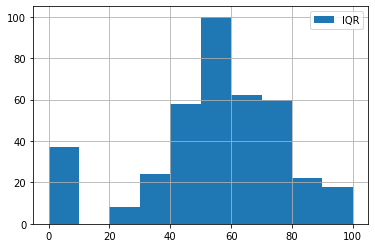

In [23]:
outlier(stud_math.score)
# Выбросов нет, но отметим необычное распределение в области значения 0

In [24]:
#посмотрим на уникальные значения и их количество столбца absences
stud_math.absences.value_counts().sort_index()
# размех значений выглядит необычным, 
# проверим наличие выбросов и характер распределения

0.0      110
1.0        3
2.0       60
3.0        7
4.0       52
5.0        5
6.0       30
7.0        6
8.0       20
9.0        3
10.0      17
11.0       2
12.0      12
13.0       2
14.0      12
15.0       2
16.0       7
17.0       1
18.0       5
19.0       1
20.0       4
21.0       1
22.0       3
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
212.0      1
385.0      1
Name: absences, dtype: int64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
Есть выбросы


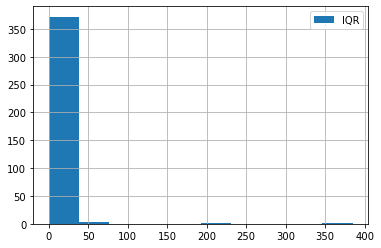

In [25]:
outlier(stud_math.absences)

C:\Users\votik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='absences'>

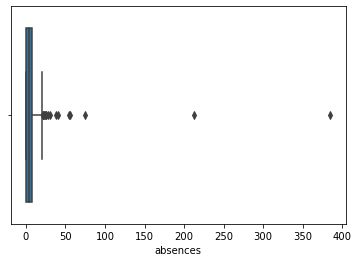

In [26]:
sns.boxplot('absences',data=stud_math)
#ешё раз убеждаемся, что выбросы есть

In [27]:
# посчитаем долю выбросов
outR_absences = 20
stud_math.absences[stud_math.absences> outR_absences].count() / stud_math.absences.count()
# количество таких значений около 4,5%, что некритично для удаления
# с учётом мыслей о том, что физически маловероятно пропустить 385 занятий, удалим значения выбросов

0.04497354497354497

In [28]:
# заменим значения выбросов пустыми строками
stud_math.absences[stud_math.absences> outR_absences] = float('Nan')

<ipython-input-28-6da1ade65de8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math.absences[stud_math.absences> outR_absences] = float('Nan')


In [29]:
# проверим, остался ли наш столбец валидным после замены значений
missed_ratio().absences
# количество пропущенных значений увеличилось до 7,2%, что не критично

0.07197943444730077

### ПРОМЕЖУТОЧНЫЙ ВЫВОД:
1. Проверил данные на соответствие заданию: удалил лишний столбец 'studytime, granular'
2. Удалил строки с пропусками в целевом столбце 'Score'
3. Обнаружил и исправил некорректно введенные данные в столбцах 'Fedu' и 'Famrel'
4. Обнаружил и удалил выбросы в столбце 'absences'
5. Отметил необычное распределение в значениии 0 целевого показателя Score

In [30]:
# согласно описанию, дата сет заполенен количественными и качественными типами признаков (и номинальными, и порядковыми)
quant = ['age','absences','score']
qual_object = ['school', 'sex', 'address', 'famsize', 'Pstatus', 
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
       'famsup', 'paid', 'activities', 'nursery', 'higher', 
       'internet', 'romantic']
qual_ordinal = ['Medu', 'Fedu','traveltime', 'studytime',
       'failures',  'famrel', 'freetime', 'goout','health']

In [31]:
stud_math[quant + qual_ordinal].corr()
#посмотрим на корреляцию количественных признаков и качественных порядковых признаков

,age,absences,score,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health
age,1.000000,0.155469,-0.155726,-0.146736,-0.152148,0.073146,-0.018227,0.205919,0.058768,0.016099,0.121115,-0.068103
absences,0.155469,1.000000,0.081274,0.066439,-0.024235,-0.050613,-0.075454,0.076537,-0.092902,0.096281,0.113048,-0.013156
score,-0.155726,0.081274,1.000000,0.213349,0.130923,-0.070559,0.115741,-0.344338,0.055305,0.019026,-0.129685,-0.070460
Medu,-0.146736,0.066439,0.213349,1.000000,0.621981,-0.165838,0.081032,-0.240319,-0.003697,0.038265,0.072320,-0.048331
Fedu,-0.152148,-0.024235,0.130923,0.621981,1.000000,-0.132036,0.017306,-0.273286,-0.016791,-0.017263,0.050997,0.018624
traveltime,0.073146,-0.050613,-0.070559,-0.165838,-0.132036,1.000000,-0.105910,0.049738,-0.032413,-0.026299,0.032629,-0.011724
studytime,-0.018227,-0.075454,0.115741,0.081032,0.017306,-0.105910,1.000000,-0.181947,0.039899,-0.125066,-0.053831,-0.079180
failures,0.205919,0.076537,-0.344338,-0.240319,-0.273286,0.049738,-0.181947,1.000000,-0.021068,0.091608,0.107747,0.088013
famrel,0.058768,-0.092902,0.055305,-0.003697,-0.016791,-0.032413,0.039899,-0.021068,1.000000,0.171165,0.072291,0.089074
freetime,0.016099,0.096281,0.019026,0.038265,-0.017263,-0.026299,-0.125066,0.091608,0.171165,1.000000,0.296338,0.064315


In [ ]:
sns.pairplot(stud_math, kind = 'reg')

In [ ]:
# посмотрим на корреляции только со значениями столбца Score
stud_math[quant + qual_ordinal].corr().score.sort_values()
# самая сильная корреляция обнаружена с ординальными признаками 'failures' и 'Medu'
# самая слабая корреляция обнаружена с ординальными признаками 'freetime' и 'famrel'

In [ ]:
# количественные показатели age и absences оставим для построения модели
val_columns = ['age', 'absences']

In [ ]:
#построим боксплоты для анализа характера распределения всех признаков
for col in stud_math.columns:
    get_boxplot(col)
# отмечаем, что на первый взгляд признаки age, adress, Medu, Fedu, Mjob, Fjob, 
# failures, schoolsup, higher, studytime 'goout', 'health', 'absences'
# могут в большей степени влиять на показатели score

In [ ]:
#проверяем гипотезы ститистической значимости качественных признаков по тесту Стьюдента
#значимые признаки добавим в наш список
for col in (qual_object + qual_ordinal):
    if get_stat_dif(col):
       val_columns = val_columns + [col]

In [ ]:
stud_math_for_model = stud_math.loc[:, val_columns]
stud_math_for_model

# Вывод:
1. Проверил данные на соответствие заданию: удалил лишний столбец 'studytime, granular'
2. Удалил строки с пропусками в целевом столбце 'Score'
3. Обнаружил и исправил некорректно введенные данные в столбцах 'Fedu' и 'Famrel'
4. Обнаружил и удалил выбросы в столбце 'absences'
5. Отметил необычное распределение в значениии 0 целевого показателя Score
6. Выделил типы признаков: количественные, качественные номинальные и ординальные
7. Проанализировал признаки (визульный анализ распределения, корреляционный анализ, тест Стьюдента) и выделил важные для построения модели